## 3.1 Uploading files from your local file system

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weatherHistory.csv to weatherHistory.csv
User uploaded file "weatherHistory.csv" with length 16294377 bytes


## 3.2 Take a quick look at the data structure

In [257]:
import pandas as pd

# read the dataset to a Pandas' dataframe
data = pd.read_csv("weatherHistory.csv")
data.head()

data.columns = data.columns.str.replace(r"\(.*\)","")
data.columns = data.columns.str.rstrip()
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ", "_")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
formatted_date          96453 non-null object
summary                 96453 non-null object
precip_type             95936 non-null object
temperature             96453 non-null float64
apparent_temperature    96453 non-null float64
humidity                96453 non-null float64
wind_speed              96453 non-null float64
wind_bearing            96453 non-null float64
visibility              96453 non-null float64
loud_cover              96453 non-null float64
pressure                96453 non-null float64
daily_summary           96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [258]:
# You can find out what categories exist and 
# how many districts belong to each category
# by using the value_counts()


#Verificar coluna precip_type (517 linhas NA)
data.precip_type.value_counts()
data.info()
sum(data.precip_type.isnull())
data.info()
#Remover NAs de precip_type
data = data[data.precip_type.notnull()]
data.info()

#Remover duplicatas em Formated Date
data = data.drop_duplicates("formatted_date")
print(data.formatted_date.value_counts())

#Verificar coluna Temperatura
data.temperature.value_counts()
sum(data.temperature.isnull())

#Verificar coluna loud_cover
print(data.loud_cover.value_counts())
#Remover colunas em branco
data = data.drop("loud_cover", axis=1)

#Remover colunas categoricas para test (formatted_date, summary, daily_summary)
data = data.drop("formatted_date", axis=1)
data = data.drop("summary", axis=1)
data = data.drop("daily_summary", axis=1)


#Remover NAs de precip_type
data = data[data.precip_type.notnull()]
data = data.drop("precip_type", axis=1)
#Descricao dos dados
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
formatted_date          96453 non-null object
summary                 96453 non-null object
precip_type             95936 non-null object
temperature             96453 non-null float64
apparent_temperature    96453 non-null float64
humidity                96453 non-null float64
wind_speed              96453 non-null float64
wind_bearing            96453 non-null float64
visibility              96453 non-null float64
loud_cover              96453 non-null float64
pressure                96453 non-null float64
daily_summary           96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
formatted_date          96453 non-null object
summary                 96453 non-null object
precip_type             95936 non-null object
temperature             96453 no

- The **count, mean, min, and max** rows are self-explanatory. 
- Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). 
- The **std** row shows the standard deviation (which measures how dispersed the values are). 
- The **25%, 50%, and 75%** rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group
of observations falls.

##3.2.1 Histogram



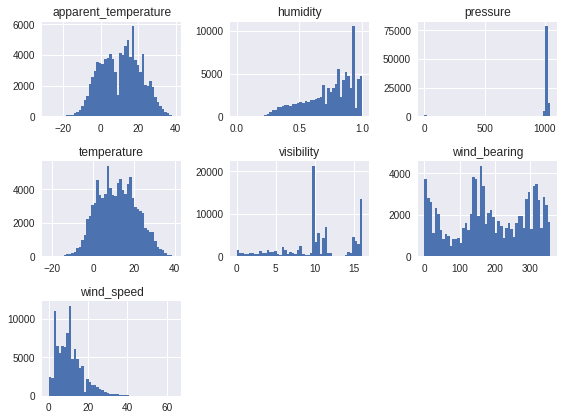

In [162]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(8,6))
plt.tight_layout()
plt.show()

In [0]:
# Cell Configuration for plotly over google colab
# This method pre-populates the outputframe with the configuration that Plotly
# expects and must be executed for every cell which is displaying a Plotly graph.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [155]:
import numpy as np
import pandas as pd
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=1000,height=400)

# generate a histogram from column median_house_value 
trace = [go.Histogram(x=data["temperature"], nbinsx=50)]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

### 3.2.2 Create a Test Set

Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the
dataset, and set them aside:



In [0]:
import numpy as np

# data - dataset
# test_ratio - percentage used to the test set
def split_train_test(data, test_ratio):
  
  #scramble the position
  shuffled_indices = np.random.permutation(len(data))
  #find the test set size
  test_set_size = int(len(data) * test_ratio)
  #split the indices
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  
  return data.iloc[train_indices], data.iloc[test_indices]

You can then use this function like this:


In [262]:
train_set, test_set = split_train_test(data, 0.2)
print("data has {} atributes, that is the same of {}\
train instances + {} test intances ({})".
      format(len(data),len(train_set),len(test_set),len(train_set)+len(test_set)))


data has 95912 atributes, that is the same of 76730train instances + 19182 test intances (95912)


Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, **which is what you want to avoid.**

[Scikit-Learn](http://scikit-learn.org/stable/) provides a few functions to split datasets into multiple subsets in various ways. The simplest function is [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) , which does pretty much the same thing as the function *split_train_test* defined earlier, with a couple of additional features. 

- First there is a **random_state** parameter that allows you to set the random generator seed
- And second you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels)

In [263]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, 
                                       test_size=0.2, 
                                       random_state=35)

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(data),len(train_set),len(test_set)))


data has 95912 instances
 76729 train instances
 19183 test intances


## 4.0 Discover and Visualize the Data to Gain Insights

So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go a little bit more in depth.

- First, make sure you have put the test set aside and **you are only exploring the training set**. 
- Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. **In our case, the set is quite small** so you can just work directly on the full set. 
- Let’s **create a copy** so you can play with it without harming the training set


In [0]:
train = train_set.copy()

### 4.1 Visualizing Scatter


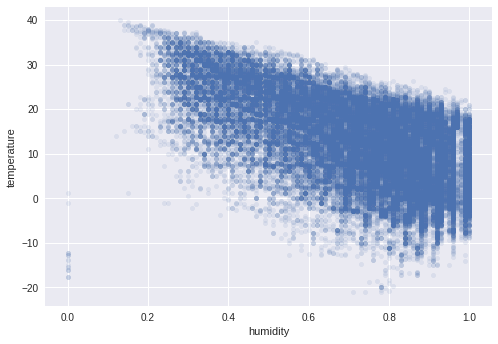

In [167]:
train.plot(kind="scatter", x="humidity", y="temperature", alpha=0.1)

In [265]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=600,height=400)

# generate a scatter from columns latitude and longitude
trace = [go.Scatter(
    x=train["humidity"], 
    y=train["temperature"],
    mode = 'markers',
    marker = dict(
      opacity = 0.1))]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

### 4.2 Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the **corr()** method:

In [266]:
corr_matrix = train.corr()
corr_matrix["temperature"].\
  sort_values(ascending=False)

temperature             1.000000
apparent_temperature    0.992644
visibility              0.393970
wind_bearing            0.028875
wind_speed              0.009427
pressure               -0.003814
humidity               -0.633102
Name: temperature, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.

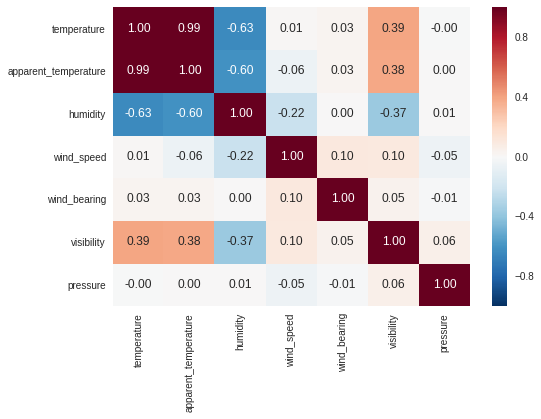

In [267]:
import seaborn as sns
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")


In [268]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=700,height=400)

# generate a scatter from columns latitude and longitude
trace = [go.Heatmap(
    x=train.corr().index, 
    y=train.corr().index,
    z=train.corr().values,
    colorscale ='Jet')]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

Another way to check for correlation between attributes is to use [Seaborn’ pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function, which plots every numerical attribute against every other numerical attribute. The main diagonal (top left to bottom right) would be full of straight lines if Seaborn plotted each variable against itself, which would not be very useful. So instead Seaborn displays a histogram of each attribute.

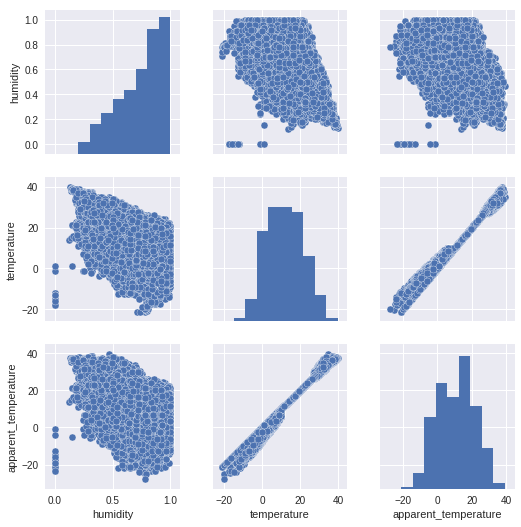

In [269]:
columns = ["humidity", "temperature", "apparent_temperature"]
sns.pairplot(train[columns], diag_kind='hist')

The most promising attribute to predict the **median house value** is the **median income**, so let’s zoom in on their correlation scatterplot.

In [174]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=600,height=400,
                  xaxis=dict(title='temperature'),
                  yaxis=dict(title='humidity')) 

# generate a scatter from columns latitude and longitude
trace = [go.Scatter(
    y=train["humidity"], 
    x=train["temperature"],
    mode = 'markers')]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

This plot reveals a few things. 
- First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed. 
- Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. 
- But this plot reveals other less obvious straight lines: a horizontal line
around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

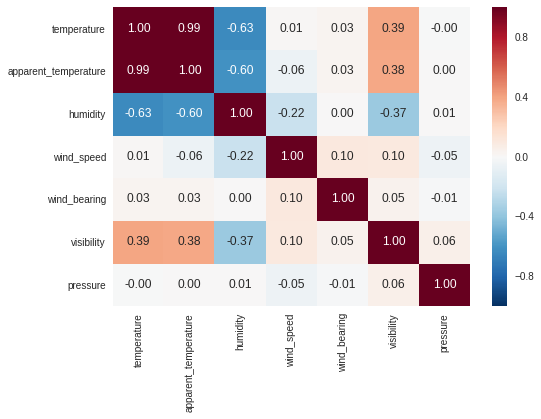

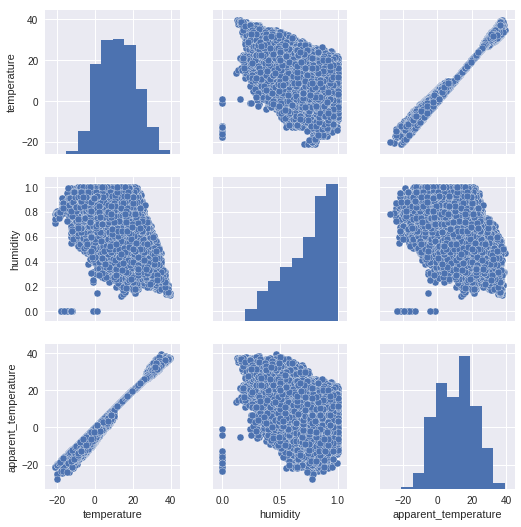

In [270]:
#Pergunta 1 - Is there a relationship between humidity and temperature? 
corr_matrix = train.corr()
corr_matrix["temperature"].sort_values(ascending=False)

#Pergunta 2 - What about between humidity and apparent temperature? 
corr_matrix["humidity"].sort_values(ascending=False)

#Pergunta 3 - Can you predict the apparent temperature given the humidity?
corr_matrix["apparent_temperature"].sort_values(ascending=False)

sns.heatmap(train.corr(), annot=True, fmt=".2f")

columns = ["temperature", "humidity", "apparent_temperature"]
sns.pairplot(train[columns], diag_kind='hist')


# 5.0 Prepare the Data for Machine Learning Algorithms


It’s time to **prepare the data** for your Machine Learning algorithms. Instead of just doing this manually, **you should write functions to do that**, for several good reasons:

- This will allow you to **reproduce** these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
-  You will gradually **build a library of transformation functions** that you can **reuse** in future projects.
- This will make it possible for you to **easily try various transformations** and see which combination of transformations works best.


But first let’s revert to a clean training set, and let’s **separate the predictors** and **the labels** since we don’t necessarily want to apply the same transformations to the predictors and the target values.

In [0]:
# just to remind ...
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=35)

# drop creates a copy of the remain data and does not affect train_set
train_X = train_set.drop("apparent_temperature", axis=1)

# copy the label (y) from train_set
train_y = train_set.apparent_temperature.copy()



## 5.1 Data Cleaning

**Most Machine Learning algorithms cannot work with missing features**, so let’s create a few functions to take care of them. You noticed earlier that the **total_bedrooms** attribute has some missing values, so let’s fix this. 


In [273]:
# count the number of missing values
train_X.isnull().sum()


temperature     0
humidity        0
wind_speed      0
wind_bearing    0
visibility      0
pressure        0
dtype: int64

In [275]:
# First, you need to create an Imputer instance, specifying that you want 
# to replace each attribute’s missing values with the median of that attribute:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")


# Since the median can only be computed on numerical attributes, we need to 
# create a copy of the data without the text attribute ocean_proximity:
#train_X_num = train_X.drop("precip_type", axis=1, inplace=True)
#train_X_num = train_X.drop("precip_type", axis=1)

# Now you can fit the imputer instance to the training data using 
# the fit() method:
imputer.fit(train_X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its **statistics_ instance variable**. 

Only the **total_bedrooms attribute** had missing values, but we cannot be sure that
there won’t be any missing values in new data after the system goes live, so **it is safer to apply the imputer to all the numerical attributes**:

In [276]:
imputer.statistics_

array([1.20555556e+01, 7.80000000e-01, 9.93370000e+00, 1.80000000e+02,
       1.00464000e+01, 1.01642000e+03])

In [277]:
train_X_num.median().values

array([1.20555556e+01, 7.80000000e-01, 9.93370000e+00, 1.80000000e+02,
       1.00464000e+01, 1.01642000e+03])

In [0]:
# Now you can use this “trained” imputer to transform the training set by 
# replacing missing values by the learned medians:
train_X_num_array = imputer.transform(train_X_num)

# The result is a plain Numpy array containing the transformed features. 
# If you want to put it back into a Pandas DataFrame, it’s simple:
train_X_num_df = pd.DataFrame(train_X_num_array, columns=train_X_num.columns)

In [279]:
train_X_num_df.isnull().sum()

temperature     0
humidity        0
wind_speed      0
wind_bearing    0
visibility      0
pressure        0
dtype: int64

## 5.2 Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median.

In [280]:
train_X.precip_type.head(10)

AttributeError: ignored

 Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these text labels to numbers.

In [201]:
# For this, we can use Pandas' factorize() method which maps each 
# category to a different integer:

train_X_cat_encoded, train_X_categories = train_X.precip_type.factorize()

# train_X_cat_encoded is now purely numerical
train_X_cat_encoded[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [202]:
# factorize() method also return the list of categories
train_X_categories

Index(['rain', 'snow'], dtype='object')

One issue with this representation is that **ML algorithms will assume that two nearby values are more similar than two distant values**. 
- Obviously this is not the case (for example, categories 0 and 4 are more
similar than categories 0 and 2). 
- To fix this issue, a common solution is to **create one binary attribute per
category**: 
  - one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. 
  - This is called **one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [223]:
# Scikit-Learn provides a OneHotEncoder encoder to convert 
# integer categorical values into one-hot vectors.

from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()

# Numpy's reshape() allows one dimension to be -1, which means "unspecified":
# the value is inferred from the lenght of the array and the remaining
# dimensions
train_X_cat_1hot = encoder.fit_transform(train_X_cat_encoded.reshape(-1,1))

# it is a column vector
train_X_cat_1hot

<76729x2 sparse matrix of type '<class 'numpy.float64'>'
	with 76729 stored elements in Compressed Sparse Row format>

- Note that the **fit_transform()** expects a 2D array, but **train_X_cat_encoded** is a 1D array, so we need to reshape it. 
- Also, notice that the  output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. If you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [224]:
train_X_cat_1hot.toarray()[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [225]:
import sys

print("Using a sparse matrix: {} bytes".format(sys.getsizeof(train_X_cat_1hot.toarray())))
print("Using a dense numpy array: {} bytes".format(sys.getsizeof(train_X_cat_1hot)))

Using a sparse matrix: 1227776 bytes
Using a dense numpy array: 56 bytes


## 5.3 Custom Transformers

Although Scikit-Learn provides many useful transformers, **you will need to write your own for tasks such as custom cleanup operations or combining specific attributes**. 

You will want your transformer to work seamlessly with Scikit-Learn functionalities. All you need is to create a class and implement three methods: 
- fit()
- transform()
- fit_transform()

You can get the last one for free by simply adding
TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args
and **kargs in your constructor) you will get two extra methods (get_params() and set_params())
that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class
that adds the combined attributes we discussed earlier:

In [0]:
import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

# indices for the columns
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

  
  #def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    #self.add_bedrooms_per_room = add_bedrooms_per_room
    
  def fit(self, X, y=None):
    return self # nothing else to do
  
  def transform(self, X, y=None):
    
    return np.c_[X]


In [282]:
attr_adder = CombinedAttributesAdder()
train_X_extra_attribs = attr_adder.transform(train_X.values)

# train_X_extra_attribs is a numpy array
# transforming it to a dataframe for better visualization
train_X_extra_attribs_df = pd.DataFrame(
    train_X_extra_attribs,
    columns=list(train_X.columns)
                          )

train_X_extra_attribs_df.head()

,temperature,humidity,wind_speed,wind_bearing,visibility,pressure
0,19.866667,0.44,12.1555,351.0,10.4006,1018.22
1,7.750000,0.96,7.7924,156.0,8.0500,0.00
2,30.066667,0.36,11.4793,314.0,10.3523,1013.70
3,25.027778,0.50,6.8908,93.0,11.3988,1016.50
4,22.644444,0.66,6.1502,280.0,15.8263,1013.75


**In this example the transformer has one hyperparameter, add_bedrooms_per_room**, set to True by default (it is often helpful to provide sensible defaults). 

This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).



## 5.5 Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, **Machine Learning algorithms don’t perform well when the input numerical attributes have
very different scales**. 

This is the case for the housing data: 
- the total number of rooms ranges from about 6 to 39,320
- the median incomes only range from 0 to 15. 

**Note that scaling the target values is generally not required.**

There are two common ways to get all attributes to have the same scale: 
- min-max scaling
- standardization.


Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called **MinMaxScaler** for this. It has a **feature_range hyperparameter** that lets you change the range if you don’t want 0–1 for some reason.


Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called **StandardScaler** for standardization.

## 5.6Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the [Pipeline class](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])
train_X_num_pipeline = num_pipeline.fit_transform(train_X_num)

In [284]:
train_X_num_pipeline

array([[ 8.26029365e-01, -1.50595859e+00,  1.96450435e-01,
         1.52212249e+00,  8.42447681e-03,  1.29938722e-01],
       [-4.39683806e-01,  1.15129791e+00, -4.35042711e-01,
        -2.93068837e-01, -5.54925524e-01, -8.44333246e+00],
       [ 1.89152656e+00, -1.91476728e+00,  9.85806489e-02,
         1.17770157e+00, -3.15120813e-03,  9.18809484e-02],
       ...,
       [ 2.08651951e+00, -1.60816076e+00,  7.09101698e-01,
         3.11994940e-01, -3.15120813e-03,  8.99443803e-02],
       [-3.35223297e-01,  2.31478352e-01,  4.66757465e-01,
        -5.44403021e-01, -1.11190934e-01,  1.16130149e-01],
       [ 1.23748770e+00, -3.30633600e-01, -4.93298536e-01,
        -1.18670149e+00, -9.18981260e-02,  6.76317478e-02]])

Now it would be nice if we could feed a Pandas DataFrame containing non-numerical columns directly into your pipeline, instead of having to first manually extract the numerical columns into a NumPy array. **There is nothing in Scikit-Learn to handle Pandas DataFrames, but we can write a custom transformer for this task**:

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# This class will transform the data by selecting the desired attributes,
# dropping the rest, and converting the resulting DataFrame to a NumPy array.
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[self.attribute_names].values

With this class:
- you can easily write a pipeline that will take a Pandas DataFrame and handle only the numerical values
- and you can just as easily write another pipeline for the categorical attributes.

In [0]:

# Used to join two or more pipelines into a single pipeline
from sklearn.pipeline import FeatureUnion

# https://github.com/scikit-learn/scikit-learn/issues/10521
from sklearn.preprocessing import OneHotEncoder

# numerical columns 
num_attribs = list(train_X_num.columns)

# categorical columns
cat_attribs = ["wind_speed"]

# pipeline for numerical columns
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])

# pipeline for categorical column
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

# a full pipeline handling both numerical and categorical attributes
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

In [296]:
# you can run the whole pipeline simply
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared


array([[ 0.82602936, -1.50595859,  0.19645044, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43968381,  1.15129791, -0.43504271, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.89152656, -1.91476728,  0.09858065, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.08651951, -1.60816076,  0.7091017 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.3352233 ,  0.23147835,  0.46675746, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.2374877 , -0.3306336 , -0.49329854, ...,  0.        ,
         0.        ,  0.        ]])

In [297]:
train_X_prepared.shape

(76729, 61)

## 6.0 Select and Train a Model

At last!!! 

- You framed the problem
- You got the data and explored it
- You sample a training set and a test set
- You wrote transformation pipelines to clean up and prepare your data
- **You are now ready to select and train a Machine Learning model**

## 6.1 Training and Evaluating on the Training Set

The good news is that thanks to all these previous steps, things are now going to be much simpler than you might think. **Let's first train a Linear Regression model.**

In [298]:
print(train_X)

       temperature  humidity  wind_speed  wind_bearing  visibility  pressure
44129    19.866667      0.44     12.1555         351.0     10.4006   1018.22
90113     7.750000      0.96      7.7924         156.0      8.0500      0.00
65318    30.066667      0.36     11.4793         314.0     10.3523   1013.70
23848    25.027778      0.50      6.8908          93.0     11.3988   1016.50
61297    22.644444      0.66      6.1502         280.0     15.8263   1013.75
6537     13.888889      0.77      4.2021         196.0     11.2700   1017.21
9213     12.750000      0.76      5.0071          38.0      9.9820   1020.15
25693    27.005556      0.42      7.7119          58.0     10.0464   1008.79
55986    -2.222222      0.81      9.6600          40.0      7.0840   1030.30
54802    -2.372222      0.68     27.8047         330.0     10.4811   1014.36
91650    21.183333      0.79      1.6905         200.0     16.1000   1014.89
77502    17.755556      0.73     21.5418         150.0     14.9086   1018.35

In [299]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [302]:
# Done!! You now have a working Linear Regression Model.
# Let's try it out on a few instances from the trainning set.

# prepare the data
some_data = train_X
some_labels = train_y
some_data_prepared = some_data

# make predictions
print("Predictions:", lin_reg.predict(some_data_prepared)) 

Predictions: [19.44096553  6.43969623 30.88342931 ... 32.58915131  6.97846268
 24.41171747]


In [303]:
# Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [19.866666666666667, 6.433333333333333, 29.377777777777773, 25.027777777777782, 22.644444444444453, 13.888888888888891, 12.750000000000002, 26.96666666666667, -5.8500000000000005, -9.288888888888888, 21.183333333333326, 17.755555555555556, 27.466666666666665, 17.0, -2.722222222222221, 17.916666666666668, 12.755555555555556, 3.5999999999999983, 21.66666666666667, -9.527777777777779, -1.2388888888888892, 21.9, -4.800000000000002, 7.5555555555555545, 20.0, 8.133333333333333, 12.82777777777778, 17.705555555555556, 12.433333333333335, 24.95, 19.90555555555555, 12.666666666666664, 15.133333333333335, 27.85, 19.822222222222226, -8.022222222222222, -1.4499999999999995, 18.905555555555555, 5.983333333333335, 27.866666666666664, 3.9388888888888913, 4.016666666666665, -13.805555555555555, 17.344444444444445, 22.844444444444452, 11.066666666666668, 28.18888888888889, 11.666666666666664, -2.294444444444444, 4.994444444444445, 6.722222222222222, -2.7333333333333343, 11.038888888888886, 26.92

It works, although the predictions are not exactly accurate. Let's measure this regression model's RMSE on the whole training set using Scikit-Learn's **mean_squared_error** function.



In [304]:
from sklearn.metrics import mean_squared_error

temperature_predictions = lin_reg.predict(train_X_prepared)
lin_mse = mean_squared_error(train_y, temperature_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

ValueError: ignored

Okay, this is better than nothing but clearly not a great score: most districts' **median_housing_values** range between 119,000 and 264,000 (look the boxplot below), so a typical prediction error of 68,089 is not very satisfying. 

This is an example of a model underfiting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are:
- select a more powerful model
- to feed the training algorithm with better features
- to reduce the constraints on the model

You could try to add more features (e.g the log of the population), but first let's try a more complex model to see how it does. 

In [308]:
import numpy as np
import pandas as pd
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=500,height=400)

# generate a histogram from column median_house_value 
temperature_values = [go.Box(y=train_y,
                        name='temperature',
                        boxmean=True)]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=temperature_values,layout=layout)
pyo.iplot(fig)

Let's train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data. 

In [309]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [310]:
# now that the model is trained, let's evaluate it on the training set

temperature_predictions = tree_reg.predict(some_data_prepared)
tree_mse = mean_squared_error(some_labels, temperature_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

ValueError: ignored

Wait, whattttttttttttttt?

No error at all?

Could this model really be absolutely perfect?

Of course, it is much more likely the model has badly overfit the data. How can you be sure?  As we saw earlier, you don't want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation. 


## 6.2 Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function:
- to **split the training set** into a **smaller training set** and a **validation set**
- then **train** your models against the **smaller training set** 
- and **evaluate** them against the **validation set**. 


It’s a bit of work, but nothing too difficult and it
would work fairly well.


A great alternative is to use [Scikit-Learn’s cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) feature. 

The following code performs K-fold cross-validation:
- it randomly splits the training set into 10 distinct subsets called folds
- then it trains and evaluates the Decision Tree model 10 times
- picking a different fold for evaluation every time and training on the other 9 folds.
- the result is an array containing the 10 evaluation scores

In [311]:
from sklearn.model_selection import cross_val_score


tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, 
                         train_X_prepared, 
                         train_y,
                         scoring="neg_mean_squared_error",
                         cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

# Scikit-Learn cross-validation features expect a utility function (greater is better)
# rather than a cost function (lower is better), so the scoring function is 
# actually the opposite of the MSE (i.e., a negative value), which is why the 
# preceding code computes scores before calculating the square root.

array([0.09977493, 0.11032067, 0.08933905, 0.09224165, 0.1049005 ,
       0.11956713, 0.09830248, 0.09419174, 0.07847085, 0.08584047])

In [0]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [313]:
display_scores(rmse_scores)

Scores: [0.09977493 0.11032067 0.08933905 0.09224165 0.1049005  0.11956713
 0.09830248 0.09419174 0.07847085 0.08584047]
Mean: 0.09729494718693274
Standard deviation: 0.01146622382148577


Now the **Decision Tree doesn’t look as good as it did earlier**. 

In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard
deviation). 

The Decision Tree has a score of approximately 70,000, generally ±2600. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.



Let’s compute the same scores for the Linear Regression model just to be sure:


In [314]:
lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg, 
                             train_X_prepared, 
                             train_y,
                             scoring="neg_mean_squared_error", 
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.05073621 1.05731827 1.05035171 1.04304836 1.03642294 1.05245
 1.04034959 1.02791836 1.04572601 1.06594951]
Mean: 1.0470270953824983
Standard deviation: 0.010285372322692315


That’s right: **the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model**.



Let’s try one last model now: the **RandomForestRegressor**. 

Random Forests works by training many Decision Trees on random subsets of the features, then averaging out their predictions. 

Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further. 

In [315]:
from sklearn.ensemble import RandomForestRegressor

# create a RandomForestRegressor model
forest_reg = RandomForestRegressor()

# fit it
forest_reg.fit(train_X_prepared, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [316]:
# predict the prepared data
temperature_predictions = forest_reg.predict(train_X_prepared)

forest_mse = mean_squared_error(train_y, temperature_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.029568686237029476

In [317]:
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                                train_X_prepared, 
                                train_y,
                                scoring="neg_mean_squared_error", 
                                cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.07800444 0.0760491  0.06464673 0.06552881 0.07330583 0.0889015
 0.08106408 0.06576982 0.0655046  0.06491177]
Mean: 0.07236866762400343
Standard deviation: 0.008048652764137625


Wow, this is much better: Random Forests look very promising. However, note:
- the score on the training set is still much lower than on the validation sets
- meaning that the model is still overfitting the training set. 

Possible solutions for overfitting are:
- to simplify the model
- constrain it (i.e., regularize it)
- or get a lot more training data. 

However, before you dive much deeper in Random Forests, you should try out
many other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

## 7.0 Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. **You now need to fine-tune them**. Let’s
look at a few ways you can do that.




## 7.1 Grid Search

One way to do that would be to fiddle with the **hyperparameters manually**, until you find a great
combination of hyperparameter values. This would be **very tedious work**, and you may not have time to
explore many combinations.


Instead you should get [Scikit-Learn’s GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for you. 

All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation. For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [0]:
from sklearn.model_selection import GridSearchCV

# hyperparameters values
# param_grid[0] - 12 combinations
# param_grid[1] - 6 combinations
param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]
              },
              {'bootstrap': [False], 
               'n_estimators': [3, 10],
               'max_features': [2, 3, 4]
              }
             ]

# create a randomforeestregressor model
forest_reg = RandomForestRegressor()

# run the grid search with cross validation
# (12 + 6) x 5 = 90 combinations
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5,
                           scoring='neg_mean_squared_error')

# see 90 combinations!!!
# it may take quite a long time
grid_search.fit(train_X_prepared, train_y)

In [0]:
# when gridsearch is done you can get the best combination of parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [0]:
# you can also get the best estimator too
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [0]:
# and of course, the evaluation scores are also available
cvres = grid_search.cv_results_
cvres

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any m

{'mean_fit_time': array([0.06990924, 0.22783661, 0.679321  , 0.1135376 , 0.36998429,
        1.12016249, 0.16098137, 0.52387199, 1.57770209, 0.20383973,
        0.67902722, 2.04019022, 0.1095089 , 0.36076398, 0.14693546,
        0.48151217, 0.1875927 , 0.6452538 ]),
 'mean_score_time': array([0.00473495, 0.01329246, 0.03714228, 0.00456848, 0.01360106,
        0.03643904, 0.00445089, 0.01278963, 0.03663311, 0.00465937,
        0.01286244, 0.03648996, 0.00555277, 0.01605444, 0.00557528,
        0.015873  , 0.00555449, 0.01651444]),
 'mean_test_score': array([-4.15999117e+09, -3.08660908e+09, -2.71135124e+09, -3.54694142e+09,
        -2.73592690e+09, -2.50205962e+09, -3.41352653e+09, -2.69471273e+09,
        -2.45370503e+09, -3.43034369e+09, -2.64185779e+09, -2.48104781e+09,
        -3.77535020e+09, -2.95470876e+09, -3.57128008e+09, -2.73806742e+09,
        -3.45497215e+09, -2.61710884e+09]),
 'mean_train_score': array([-1.13523569e+09, -5.66574341e+08, -4.23877053e+08, -9.58726689e+08,
 

In [0]:
# a fancy visualization of results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64497.993547298574 {'max_features': 2, 'n_estimators': 3}
55557.25946013379 {'max_features': 2, 'n_estimators': 10}
52070.63702205001 {'max_features': 2, 'n_estimators': 30}
59556.203848164994 {'max_features': 4, 'n_estimators': 3}
52306.08858772325 {'max_features': 4, 'n_estimators': 10}
50020.59198917925 {'max_features': 4, 'n_estimators': 30}
58425.392826089344 {'max_features': 6, 'n_estimators': 3}
51910.62249827634 {'max_features': 6, 'n_estimators': 10}
49534.88695811002 {'max_features': 6, 'n_estimators': 30}
58569.136011037335 {'max_features': 8, 'n_estimators': 3}
51399.005741454974 {'max_features': 8, 'n_estimators': 10}
49810.117569768365 {'max_features': 8, 'n_estimators': 30}
61443.87843825742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54357.23278620092 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59760.18806219216 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52326.546042413844 {'bootstrap': False, 'max_features': 3, 'n_estimato

In this example, we obtain the best solution by setting:
- the **max_features** hyperparameter to **6**
- and the **n_estimators** hyperparameter to **30**. 

The RMSE score for this combination is 49,481, which is slightly better than the score you got earlier using the default hyperparameter values (which was 51,969).

**Congratulations, you have successfully fine-tuned your best model!**

## 3.0 Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) instead. 
 - it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.
 
This approach has two main benefits:
- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
- You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

## 3.1 Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.



## 3.2 Analyze the Best Models and Their Errors

In [0]:
# can indicate the relative importance of each attribute 
# for making accurate predictions
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.87423698e-02, 7.19964448e-02, 4.39549116e-02, 1.80998285e-02,
       1.63632793e-02, 1.75549786e-02, 1.56041456e-02, 3.53989544e-01,
       5.70186035e-02, 1.06522529e-01, 6.33311057e-02, 1.41611057e-02,
       1.34340593e-01, 2.45108587e-04, 3.22312113e-03, 4.85233110e-03])

In [0]:
# let's display these importance scores next to their corresponding attribute names

# extra numerical columns
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# categorical component of pipeline
cat_encoder = cat_pipeline.named_steps["cat_encoder"]

# get the names
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# all columns names
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [0]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.353989543798363, 'median_income'),
 (0.13434059314021846, 'INLAND'),
 (0.10652252919674918, 'pop_per_hhold'),
 (0.07874236980919312, 'longitude'),
 (0.07199644484303452, 'latitude'),
 (0.06333110574623965, 'bedrooms_per_room'),
 (0.05701860350035514, 'rooms_per_hhold'),
 (0.043954911556316076, 'housing_median_age'),
 (0.018099828470609505, 'total_rooms'),
 (0.017554978589238487, 'population'),
 (0.016363279301931325, 'total_bedrooms'),
 (0.01560414556486487, 'households'),
 (0.014161105670307693, '<1H OCEAN'),
 (0.004852331099045453, 'NEAR OCEAN'),
 (0.0032231211269021605, 'NEAR BAY'),
 (0.00024510858663137055, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., **apparently only one ocean_proximity category is really useful**, so you could try dropping the others).

# 3.3 Present your solution


After tweaking your models for a while, you eventually have a system that performs sufficiently well. **Now is the time to evaluate the final model on the test set**.

There is nothing special about this process:
- just get the **predictors** and the **labels** from your **test set**, 
- **run your full_pipeline** to transform the data (**call transform(), not fit_transform()!**)
- and **evaluate** the final model on the test set

In [0]:
# best model found in gridsearch step
final_model = grid_search.best_estimator_

# predictors and label
test_X = test_set.drop("median_house_value", axis=1)
test_y = test_set["median_house_value"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)


final_predictions = final_model.predict(test_X_prepared)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

50027.076978996345


The performance will usually be slightly worse than what you measured using cross-validation if you did a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation data, and will likely not perform as well on unknown datasets).

It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good
on the test set; the improvements would be unlikely to generalize to new data.

Now comes the project prelaunch phase: 
- you need to present your solution
- highlighting what you have learned
- what worked and what did not
- what assumptions were made
- and what your system’s limitations are
- document everything
- and create nice presentations with clear visualizations and easy-to-remember
statements (e.g., “the median income is the number one predictor of housing prices”).